In [2]:
import numpy as np
import pandas as pd
import logging
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
df_movies = pd.read_csv('../dataset/tmdb_5000_movies.csv')

In [4]:
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
print("Movies DF:\n")
print(df_movies.info(),"\n\n")
print(df_movies.describe(),"\n\n")
print(df_movies['original_language'].value_counts())
print("\n{}".format(df_movies['status'].value_counts()))
print(f"\n{df_movies['status'].value_counts()}")
print(f"\n\nDuplicates:\n\n{df_movies.duplicated().sum()}")
print("\n\nNulls:\n\n{}\n\n**************************************\n\n".format(df_movies.isnull().sum()))

Movies DF:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status   

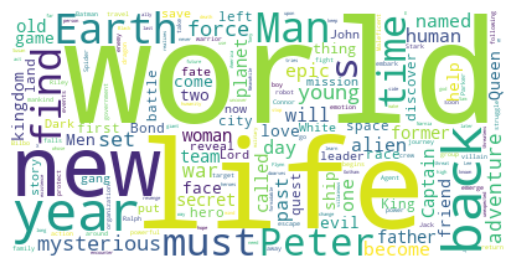

In [6]:
    df_movies['overview'] = df_movies['overview'].fillna('')
    text = "".join(cat for cat in df_movies['overview'][:100])
    word_cloud = WordCloud(collocations=False, background_color='white').generate(text)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


In [7]:
from textblob import TextBlob
def sentimental_analysis(text):
    """
    Creates an object of the TextBlob class, the sentiment attribute is used:
    polarity: how positive or negative the sentiment is
    """
    sentiment = TextBlob(str(text)).sentiment
    return sentiment.polarity, sentiment.subjectivity

sentiment = TextBlob(str(text)).sentiment
df_movies["polarity"], df_movies["subjectivity"] = zip(*df_movies['overview'].apply(sentimental_analysis))

In [8]:
df_movies.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,polarity,subjectivity
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,0.041667,0.616667
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,-0.083333,0.266667
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,-0.306250,0.518750
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,-0.044805,0.372078
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,-0.016667,0.566667


Let's see how the revenue is spread across the movies

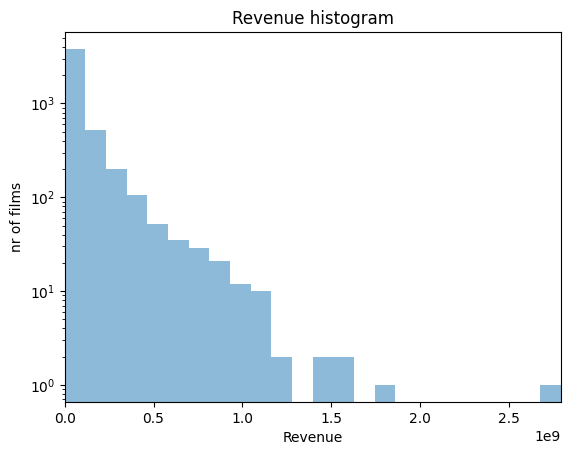

In [9]:
def plotHistogram(df, col, tit='', xlabel='', ylabel='', log=False):
    bins = np.linspace(df[col].min(), df[col].max(), 25)
    plt.xlim(df[col].min(), df[col].max())
    plt.hist(df[col], bins=bins, alpha=0.5, log=log)
    plt.title(tit)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plotHistogram(df_movies, 'revenue', ylabel="nr of films", xlabel='Revenue', tit='Revenue histogram', log=True)

We can draw the conclusion based on the plot that the distribution is close to an exponential

Let's check the distribution of budget

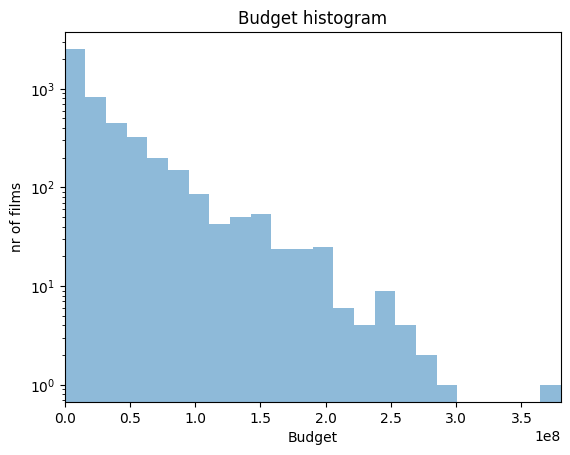

In [10]:
plotHistogram(df_movies, 'budget', ylabel="nr of films", xlabel='Budget', tit='Budget histogram', log=True)

We can notice that the in a vast majority of cases the revenue is directly proportonal to the budget of the movie,

Let's see how revenue compares to other variables in a direct comparison

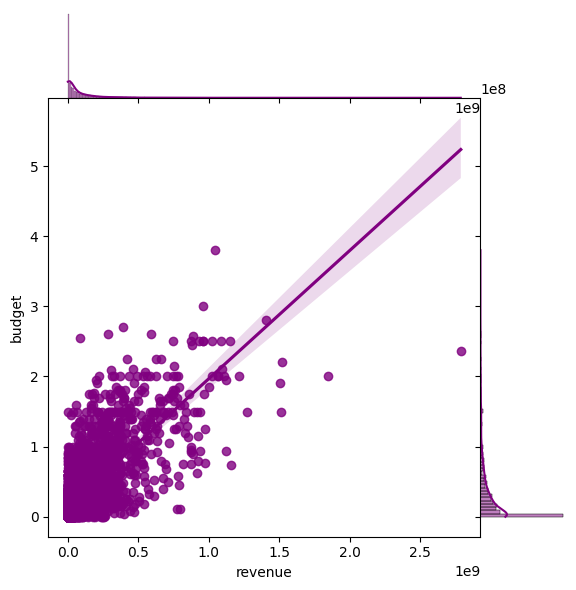

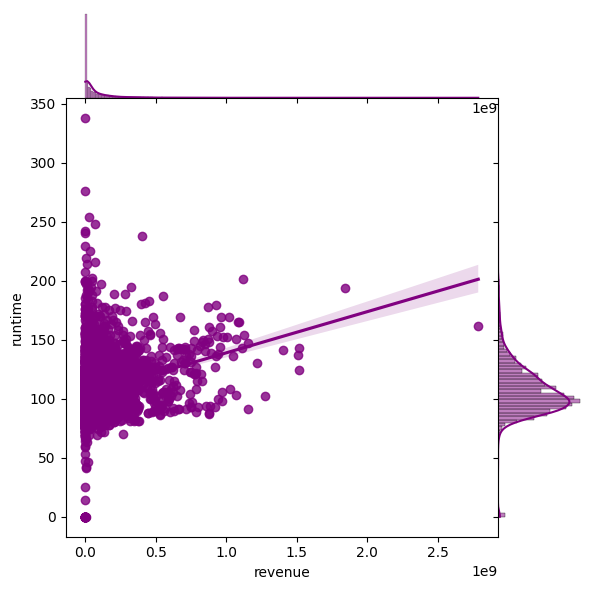

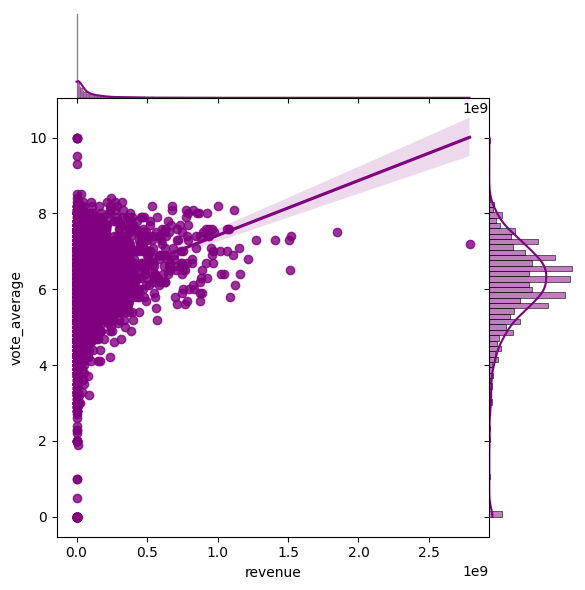

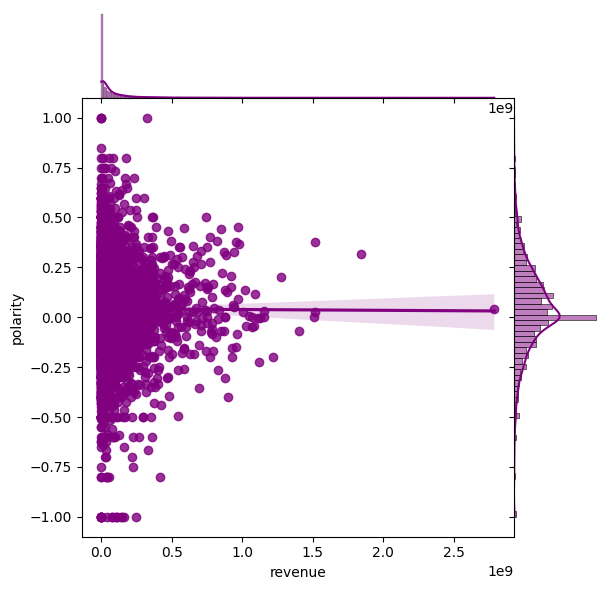

In [11]:
import seaborn as sns
import scipy.stats as stats

# Array for column names with what we want to compare
revenue_comparisons = ["budget", 'runtime', 'vote_average', 'polarity']

# Iterate through each of the columns for above and plot them separately
for comparison in revenue_comparisons:
    graph = sns.jointplot(x='revenue', y=comparison, data=df_movies, color='purple', space=0, kind='reg')

Again the graph proves to us that the budget has a significant influence on the revenue of the movie

Now let's see the corelation of this data among themself

Text(0.5, 1.0, 'Correlation matrix heatmap')

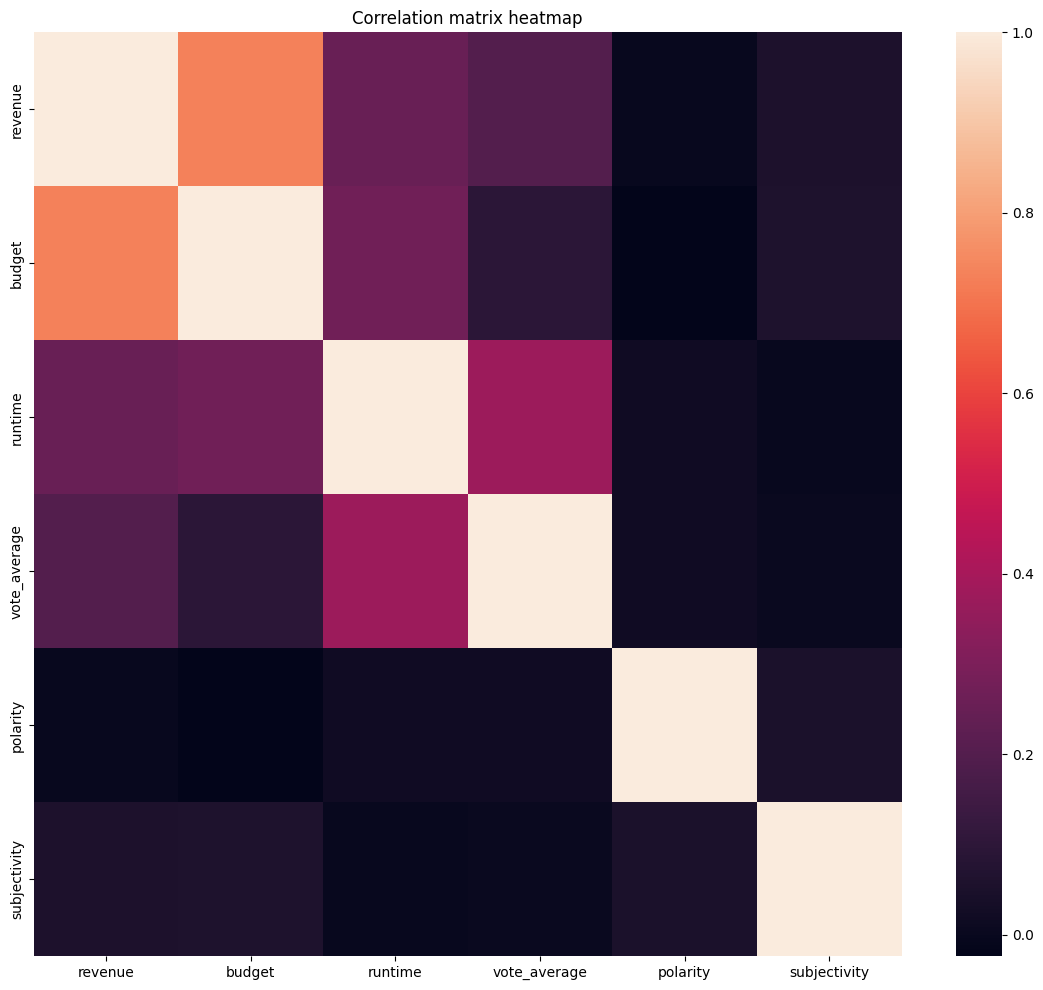

In [12]:
fig, ax = plt.subplots(figsize=(14,12))
new = df_movies[['revenue', 'budget', 'runtime', 'vote_average', 'polarity', 'subjectivity']].copy()
new = new.corr()
sns.heatmap(new, ax=ax);
ax.set_title('Correlation matrix heatmap')

Let's see how the budget of a movie is related to it's profability <br>
For this we'll create a new column revenue_budget_ratio to see how profitable is the movie <br>

Then we'll check the corelation

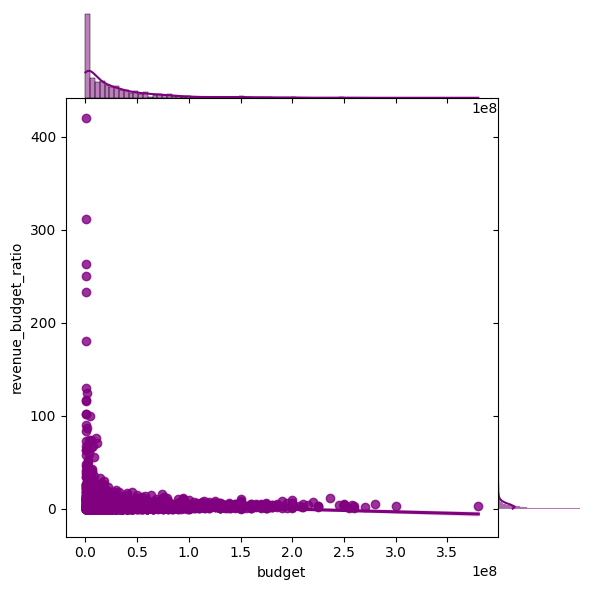

In [13]:
# We'll filter the movies using a minimum budget of  100k to avoid independent movies
min_budget = 100000
df_movies['revenue_budget_ratio'] = df_movies['revenue'][df_movies['budget']>min_budget]/df_movies['budget'][df_movies['budget']>min_budget]

sns.jointplot(x='budget', y='revenue_budget_ratio', data=df_movies, kind='reg', color='purple', space=0)


We can see that even if the budget strongly correlates with the revenue, it does affect negatively the abillity of a movie to become profitable

Let's check how does the revenue and profitability behaves for the main 7 genres of the film

In [14]:
patternname = r"(?:.name.: .)(\w{1,}\s{0,}\w{0,})"
patternlang = r"(?:.iso_639_1.: .)(\w{1,}\s{0,}\w{0,})"

def dict2list(x):
    """
    Input: It expects x, a string that resembles a list of dictionaries.
    Extract important info out the string columns that contain of lists of dictionaries
    """
    if type(x) is str:
        templist = x.strip('[]').split(',')
        namelist = []
        lang = False
        for element in templist:
            if re.search(patternlang, element):
                namelist.append(re.search(patternlang, element).group(0)[14:])
                lang = True
            elif re.search(patternname, element) and not lang:
                namelist.append(re.search(patternname, element).group(0)[9:])
        if len(namelist) > 0:
            return {k: 1 for k in namelist}
        else:
            return x
    else:
        return x


#Second, lets use the newly created dictionaries to create dummy columns for the categorical columns

def dict2dummy(df, columns):
    """
    Input:
        df: A pandas DataFrame.
        columns: A list of column names in the DataFrame that contain dictionaries or dictionary-like data
    Converts DataFrame columns containing dictionary-like data into one-hot encoded dummy variables for further analysis.
    """
    columnnames = {}
    for col in columns:
        columnnames[col] = list(df[col].apply(pd.Series).drop([0], axis=1))
        df = pd.concat([df.drop([col], axis=1), df[col].apply(pd.Series).fillna(0).drop([0], axis=1)], axis=1)
        return df, columnnames


df_movies = df_movies.map(dict2list)
dummy_features = ['genres']
df_movies, columndictionary = dict2dummy(df_movies, dummy_features)


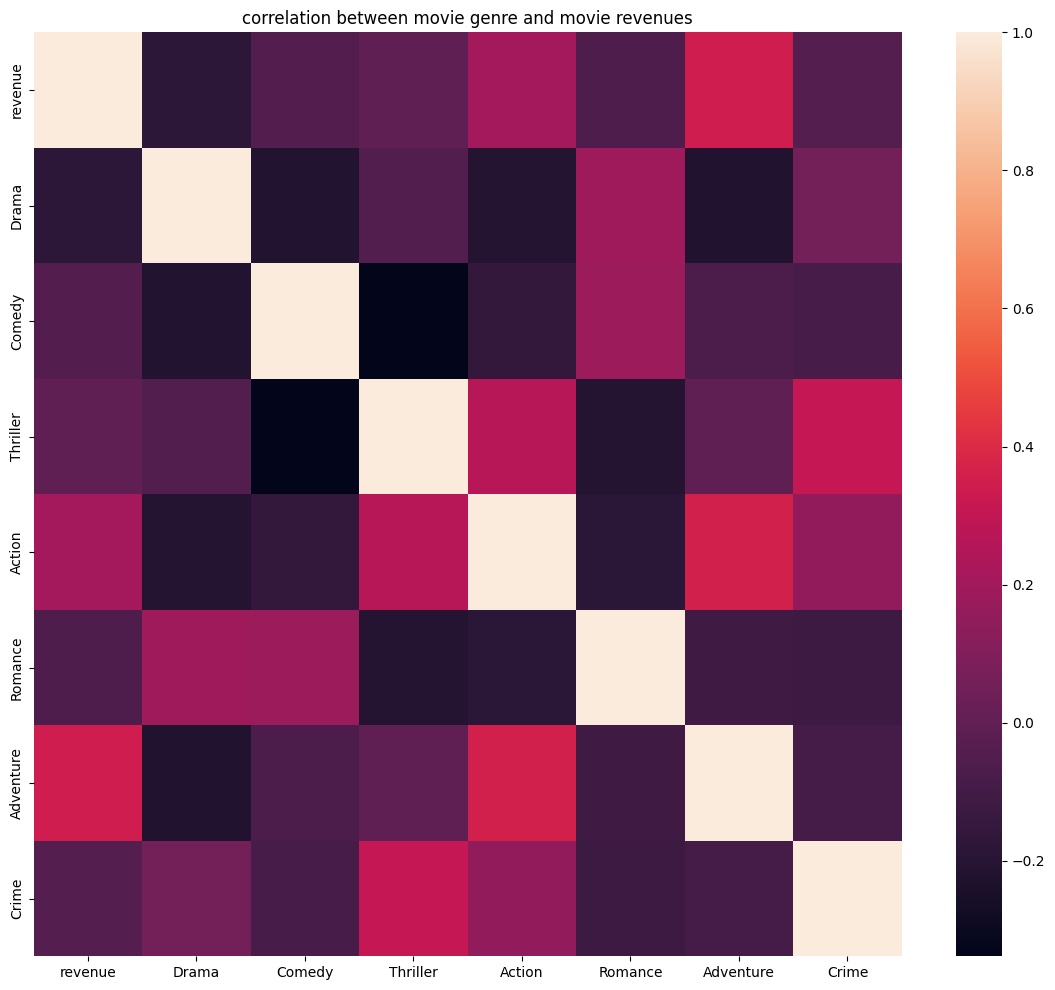

In [15]:
main_genres = df_movies[columndictionary.get('genres')].sum().sort_values(ascending=False).head(7).index.values[:]

fig, ax = plt.subplots(figsize=(14, 12))
new = df_movies[['revenue', main_genres[0], main_genres[1], main_genres[2], main_genres[3], main_genres[4], main_genres[5], main_genres[6]]].copy()
new = new.corr()
sns.heatmap(new, ax=ax)
ax.set_title('correlation between movie genre and movie revenues');

The heatmap shows that the Action and Adventure movies have a higher correlation with the revenue

What about the film profitability ? Does it favor anu specific genres?

Text(0.5, 1.0, 'Correlation between film genre and profitability')

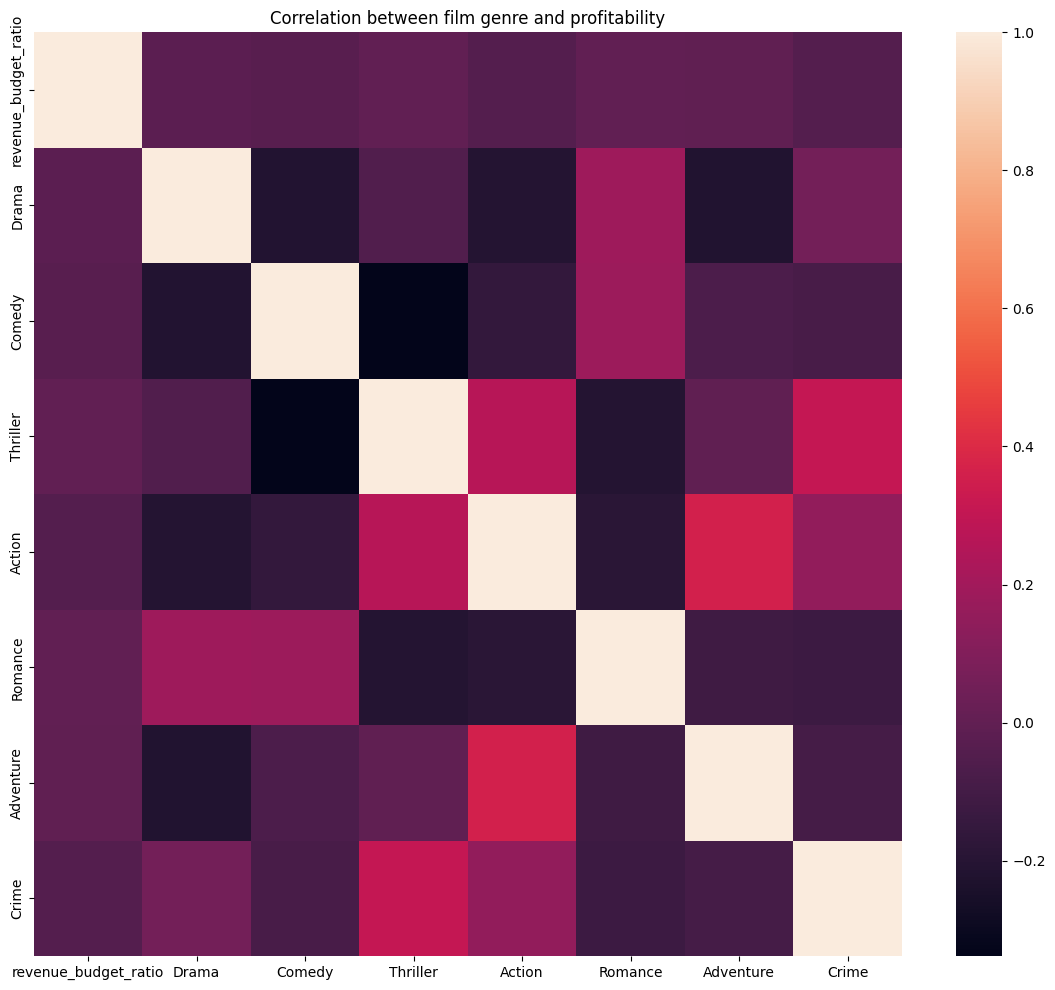

In [18]:
fig, ax = plt.subplots(figsize=(14, 12))
new = df_movies[['revenue_budget_ratio', main_genres[0], main_genres[1], main_genres[2], main_genres[3], main_genres[4], main_genres[5], main_genres[6]]].copy()
new = new.corr()
sns.heatmap(new, ax=ax)
ax.set_title("Correlation between film genre and profitability")

It seems like there is no strong correlation between any genre and profitability